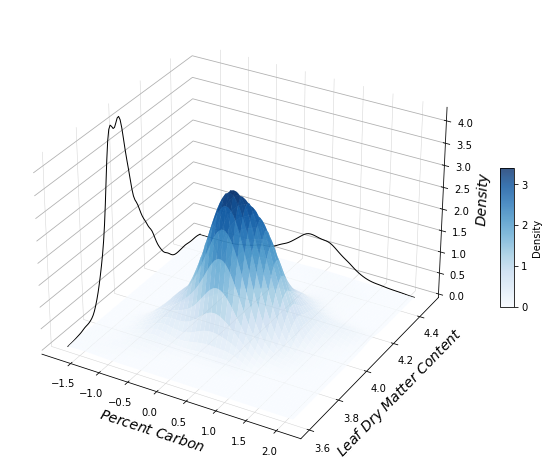

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\pc\pc_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\ldmc\ldmc_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.3  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
# Z[Z <= 0.1] = np.nan

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{Percent\ Carbon}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Leaf\ Dry\ Matter\ Content}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)



# Save the plot as a PNG file
# Adjust margins to ensure everything is within the frame
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site1b_pc_ldmc.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution



plt.show()


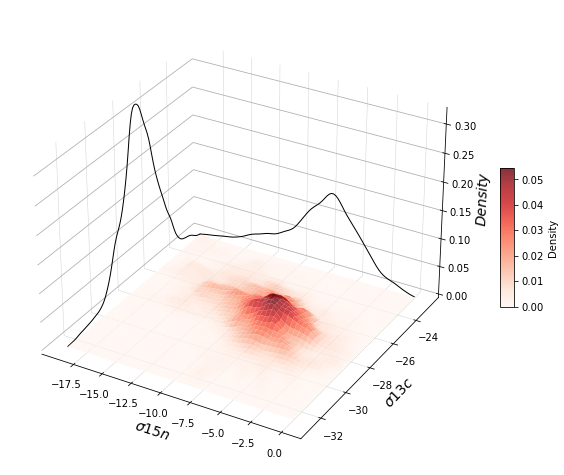

In [2]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
sla_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\d13c\d13c_site1b_18_047.tif'  # Replace with your log_La GeoTIFF file
log_la_file = r'E:\wenqu\trait_map\update1\trait_map_with_scale\clip\site1b\d15n\d15n_site1b_18_047.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.1  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
# Z[Z <= 0.1] = np.nan

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='Reds', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{σ15n}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{σ13c}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)



# Save the plot as a PNG file
# Adjust margins to ensure everything is within the frame
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site1b_d15n_d13c.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution



plt.show()


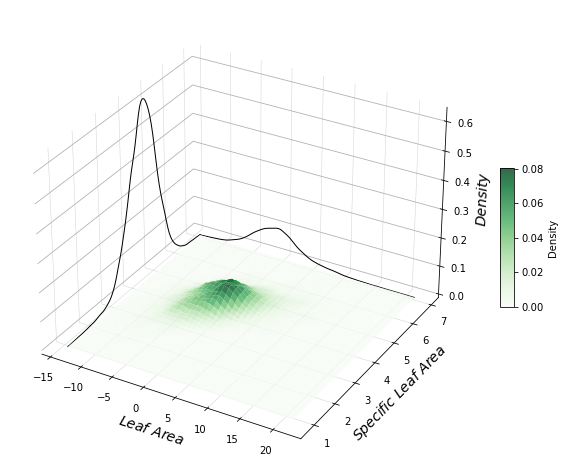

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update6\clip\site2c\la\la_site2c_16_18.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update6\clip\site2c\sla\sla_site2c_16_18.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.1  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
# Z[Z <= 0.1] = np.nan

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='Greens', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linewidth = 0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Specific\ Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)



# Save the plot as a PNG file
# Adjust margins to ensure everything is within the frame
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_la_sla.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution



plt.show()


# Site2c LA, SLA

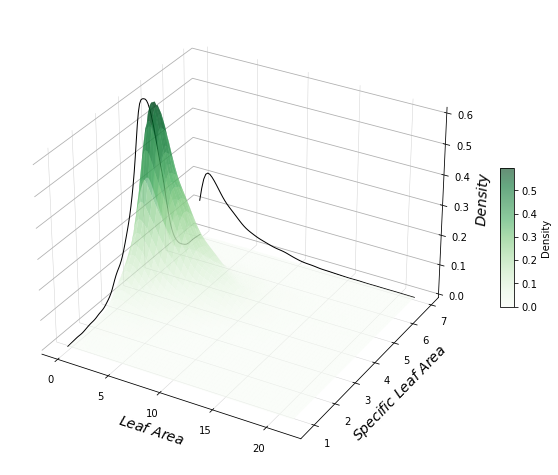

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data > 0].flatten()  # Only positive values for better KDE results

# Read the two GeoTIFF files (log_La and SLA)
log_la_file = r'E:\wenqu\trait_map\update6\clip\site2c\la\la_site2c_16_18.tif'  # Replace with your log_La GeoTIFF file
sla_file = r'E:\wenqu\trait_map\update6\clip\site2c\sla\sla_site2c_16_18.tif'  # Replace with your SLA GeoTIFF file

log_la_data = read_tif_data(log_la_file)
sla_data = read_tif_data(sla_file)

# Check if the arrays are of the same length
min_length = min(len(log_la_data), len(sla_data))
log_la_data = log_la_data[:min_length]
sla_data = sla_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.2  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([log_la_data, sla_data]), bw_method=bandwidth)

# Define grid for log_La and SLA
x = np.linspace(min(log_la_data), max(log_la_data), 100)
y = np.linspace(min(sla_data), max(sla_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# --- Adjust the scaling of the 3D plot ---
# Normalize the 3D plot to match the side KDE curve values
max_side_density = max(np.max(gaussian_kde(log_la_data)(x)), np.max(gaussian_kde(sla_data)(y)))
Z_normalized = Z / np.max(Z) * max_side_density

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with normalized Z values
surface = ax.plot_surface(X, Y, Z_normalized, cmap='Greens', edgecolor='none', alpha=0.6)

# Plot p(y): KDE of SLA on the wall corresponding to the SLA axis
kde_sla = gaussian_kde(sla_data)
sla_density = kde_sla(y)
ax.plot(np.zeros_like(y) + min(log_la_data), y, sla_density, color='black', lw=1)

# Plot p(x): KDE of log_La on the vertical wall along the log_La axis
kde_log_la = gaussian_kde(log_la_data)
log_la_density = kde_log_la(x)
ax.plot(x, np.full_like(x, max(sla_data)), log_la_density, color='black', lw=1)

# Adjust Z-axis scaling for better surface visibility
ax.set_zlim(0, np.max(Z_normalized))  # Set Z-axis limit to match the normalized surface density

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (if you want transparency on the floor as well)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_La
ax.set_ylabel(r'$\mathit{Specific\ Leaf\ Area}$', fontsize=14)  # Math-style italic label for log_SLA
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)

# Save the plot as a PNG file
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_la_sla_adjusted.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution

plt.show()


# Site2c d15n_d13c

d13c_data size: 29399
d15n_data size: 29399


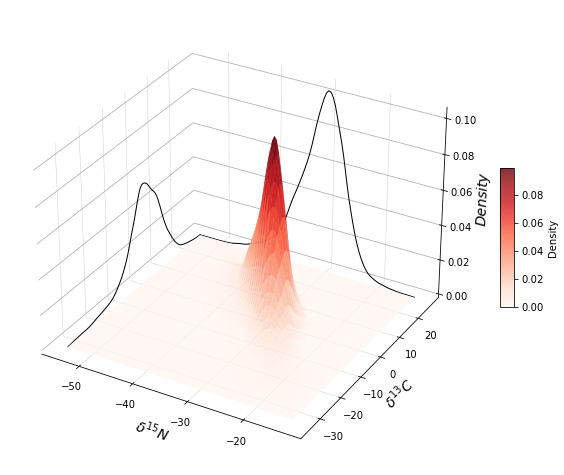

In [1]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()  # Only positive values for better KDE results

# Read the two GeoTIFF files (d13c and d15n)
d13c_file = r'E:\wenqu\trait_map\update6\clip\site2c\d13c\d13c_site2c_16_18.tif'
d15n_file = r'E:\wenqu\trait_map\update6\clip\site2c\d15n\d15n_site2c_16_18.tif' 

d13c_data = read_tif_data(d13c_file)
d15n_data = read_tif_data(d15n_file)

# Debugging: Check the size of the datasets
print(f"d13c_data size: {len(d13c_data)}")
print(f"d15n_data size: {len(d15n_data)}")

# Ensure both datasets have multiple elements
if len(d13c_data) < 2 or len(d15n_data) < 2:
    raise ValueError("One of the datasets has fewer than 2 valid data points.")

# Check if the arrays are of the same length
min_length = min(len(d13c_data), len(d15n_data))
d13c_data = d13c_data[:min_length]
d15n_data = d15n_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.2  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([d13c_data, d15n_data]), bw_method=bandwidth)

# Define grid for d13C and d15N
x = np.linspace(min(d13c_data), max(d13c_data), 100)
y = np.linspace(min(d15n_data), max(d15n_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# --- Adjust the scaling of the 3D plot ---
# Normalize the 3D plot to match the side KDE curve values
max_side_density = max(np.max(gaussian_kde(d13c_data)(x)), np.max(gaussian_kde(d15n_data)(y)))
Z_normalized = Z / np.max(Z) * max_side_density

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with normalized Z values
surface = ax.plot_surface(X, Y, Z_normalized, cmap='Reds', edgecolor='none', alpha=0.8)

# Plot p(y): KDE of d15N on the wall corresponding to the d15N axis
kde_d15n = gaussian_kde(d15n_data)
d15n_density = kde_d15n(y)
ax.plot(np.zeros_like(y) + min(d13c_data), y, d15n_density, color='black', lw=1)

# Plot p(x): KDE of d13C on the vertical wall along the d13C axis
kde_d13c = gaussian_kde(d13c_data)
d13c_density = kde_d13c(x)
ax.plot(x, np.full_like(x, max(d15n_data)), d13c_density, color='black', lw=1)

# Adjust Z-axis scaling for better surface visibility
ax.set_zlim(0, np.max(Z_normalized))  # Set Z-axis limit to match the surface density range

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (make it fully transparent)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels with TeX-style math font
ax.set_xlabel(r'$\mathit{\delta^{15}N}$', fontsize=14)  # Math-style italic label for d15N
ax.set_ylabel(r'$\mathit{\delta^{13}C}$', fontsize=14)  # Math-style italic label for d13C
ax.set_zlabel(r'$\mathit{Density}$', fontsize=14)

# Save the plot as a PNG file
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_d15n_d13c_adjusted.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution

plt.show()


Percent Carbon (PC) data size: 29399
Leaf Dry Matter Content (LDMC) data size: 29399


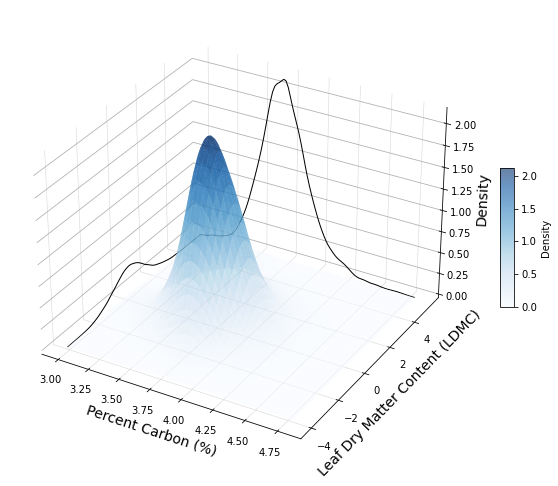

In [2]:
import numpy as np
from osgeo import gdal
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Function to read GeoTIFF data and flatten it
def read_tif_data(file_name):
    dataset = gdal.Open(file_name)
    data = dataset.ReadAsArray()
    # Flatten the array and remove any zero or negative values (if needed)
    return data[data != 0].flatten()  # Only positive values for better KDE results

# Read the two GeoTIFF files (Percent Carbon and Leaf Dry Matter Content)
pc_file = r'E:\wenqu\trait_map\update6\clip\site2c\pc\pc_site2c_16_18.tif'  # Percent Carbon file
ldmc_file = r'E:\wenqu\trait_map\update6\clip\site2c\ldmc\ldmc_site2c_16_18.tif'  # Leaf Dry Matter Content file

pc_data = read_tif_data(pc_file)
ldmc_data = read_tif_data(ldmc_file)

# Debugging: Check the size of the datasets
print(f"Percent Carbon (PC) data size: {len(pc_data)}")
print(f"Leaf Dry Matter Content (LDMC) data size: {len(ldmc_data)}")

# Ensure both datasets have multiple elements
if len(pc_data) < 2 or len(ldmc_data) < 2:
    raise ValueError("One of the datasets has fewer than 2 valid data points.")

# Check if the arrays are of the same length
min_length = min(len(pc_data), len(ldmc_data))
pc_data = pc_data[:min_length]
ldmc_data = ldmc_data[:min_length]

# Create 2D KDE (Kernel Density Estimation) based on the two trait datasets
bandwidth = 0.3  # You can tune this value for more/less smoothness
kde = gaussian_kde(np.vstack([pc_data, ldmc_data]), bw_method=bandwidth)

# Define grid for Percent Carbon and Leaf Dry Matter Content
x = np.linspace(min(pc_data), max(pc_data), 100)
y = np.linspace(min(ldmc_data), max(ldmc_data), 100)
X, Y = np.meshgrid(x, y)

# Evaluate the KDE on a grid of points
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# --- Adjust the scaling of the 3D plot ---
# Normalize the 3D plot to match the side KDE curve values
max_side_density = max(np.max(gaussian_kde(pc_data)(x)), np.max(gaussian_kde(ldmc_data)(y)))
Z_normalized = Z / np.max(Z) * max_side_density

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with normalized Z values
surface = ax.plot_surface(X, Y, Z_normalized, cmap='Blues', edgecolor='none', alpha=0.6)

# Plot p(y): KDE of LDMC on the wall corresponding to the LDMC axis
kde_ldmc = gaussian_kde(ldmc_data)
ldmc_density = kde_ldmc(y)
ax.plot(np.zeros_like(y) + min(pc_data), y, ldmc_density, color='black', lw=1)

# Plot p(x): KDE of Percent Carbon on the vertical wall along the Percent Carbon axis
kde_pc = gaussian_kde(pc_data)
pc_density = kde_pc(x)
ax.plot(x, np.full_like(x, max(ldmc_data)), pc_density, color='black', lw=1)

# Adjust Z-axis scaling for better surface visibility
ax.set_zlim(0, np.max(Z_normalized))  # Set Z-axis limit to match the surface density range

# Make the vertical surfaces (XZ and YZ) transparent
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # XZ plane (make it fully transparent)
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # YZ plane (make it fully transparent)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Z plane (make it fully transparent)

# Set grid line color and thickness for XZ and YZ planes
ax.xaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # XZ plane grid color and line width
ax.yaxis._axinfo['grid'].update(color='lightgray', linewidth=0.5)  # YZ plane grid color and line width

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add the color bar with custom size
cbar = fig.colorbar(surface, ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Density', fontsize=10)  # Change the font size of the color bar label

# Set custom x, y, and z labels without using LaTeX for 'Percent' symbol
ax.set_xlabel('Percent Carbon (%)', fontsize=14)  # x-axis label
ax.set_ylabel('Leaf Dry Matter Content (LDMC)', fontsize=14)  # y-axis label
ax.set_zlabel('Density', fontsize=14)  # z-axis label

# Save the plot as a PNG file
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)

output_path = r'D:\wenqu\chapter1_2\figures\site2c_pc_ldmc_adjusted.png'  # Replace with your desired file path
plt.savefig(output_path, format='png', dpi=300, bbox_inches=None)  # Save with high resolution

plt.show()
